In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [6]:
@staticmethod
def factor(df):
    '''衡量当前成交量高低的过滤器'''
    volume_mean = df['volume'].rolling(20).mean()
    volume_deviation = (df['volume'] - volume_mean) / volume_mean
    return volume_deviation

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.002965
   Rank_IC (Spearman): -0.007255
📊 信息比率:
   IR: 1.179960
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 131016
   因子列: factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


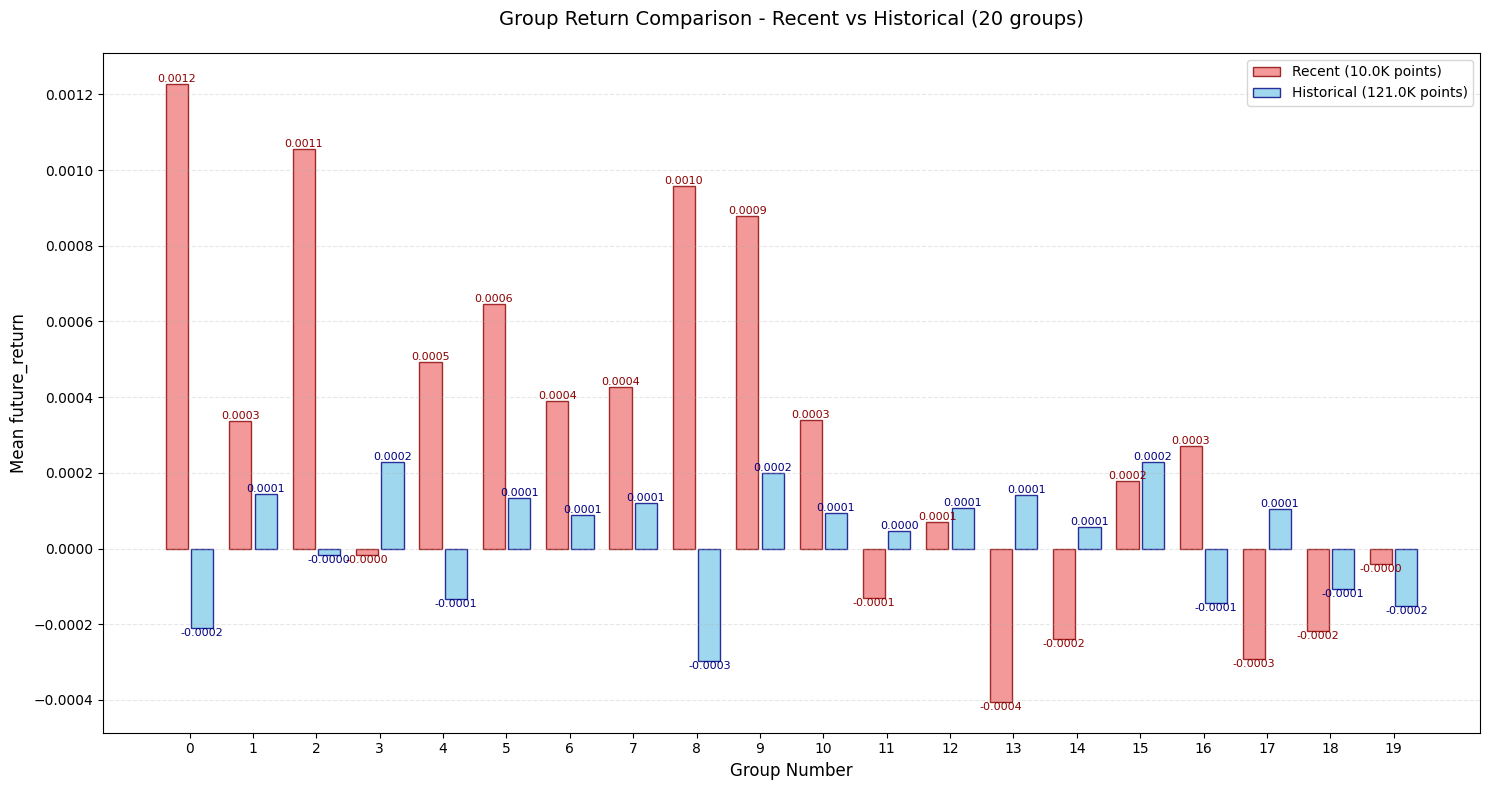

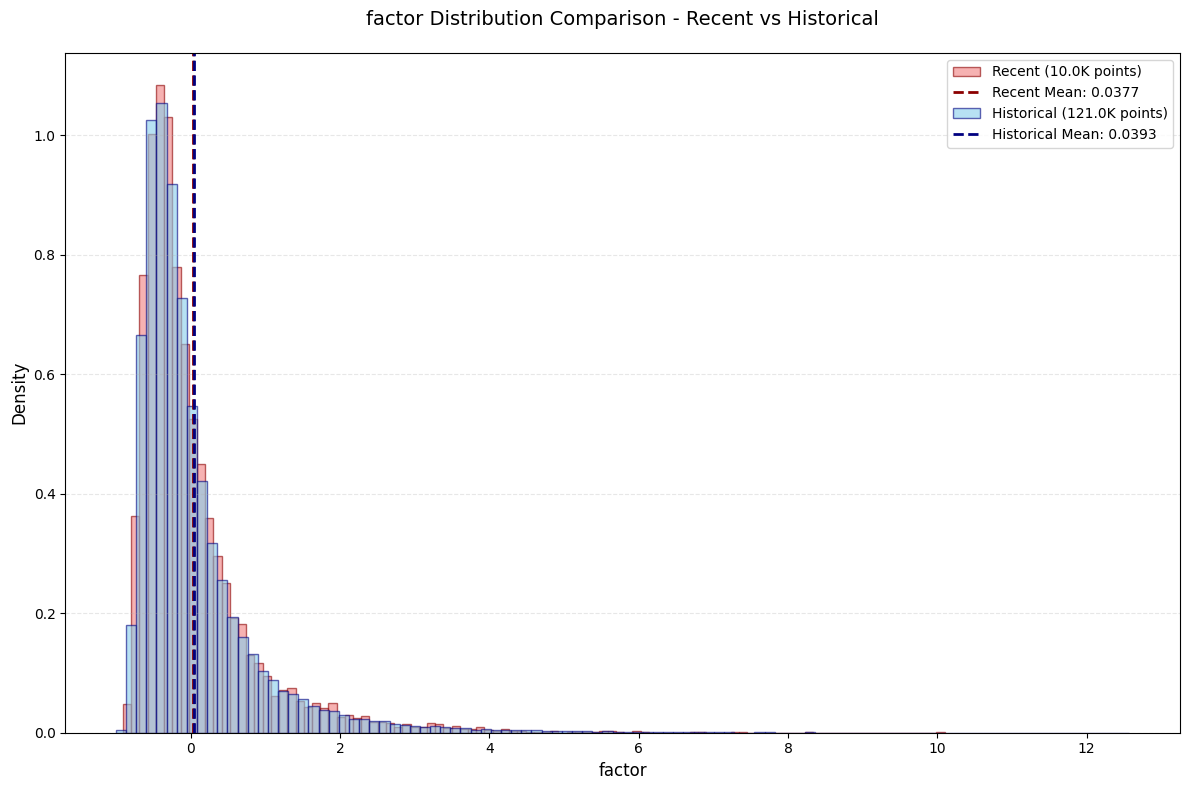

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [7]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

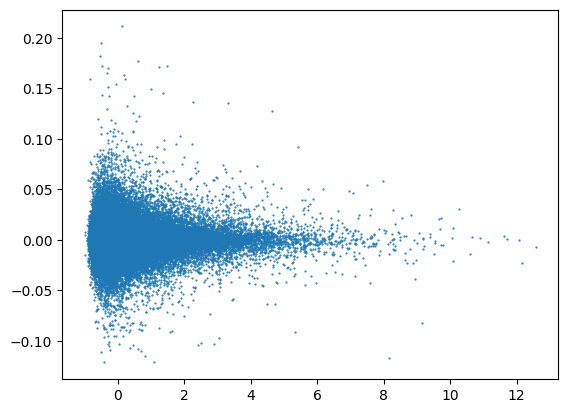

In [8]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [9]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[0.014287617990170639,
 0.005732664278179267,
 0.019375808428205722,
 -0.0034064584288327113,
 0.012784612822489572,
 -0.002570056708401591,
 0.009264479216232399,
 0.012674806115454676,
 0.007184782780898175,
 0.005492352506518489]

In [10]:
print(result)

{'correlation_analysis': {'IC': -0.002964970655802528, 'Rank_IC': -0.007254701380049642}, 'information_ratio': {'IR': 1.1799595536243375, 'group_correlations': [0.014287617990170639, 0.005732664278179267, 0.019375808428205722, -0.0034064584288327113, 0.012784612822489572, -0.002570056708401591, 0.009264479216232399, 0.012674806115454676, 0.007184782780898175, 0.005492352506518489], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0      -1.0000  -0.6792   -0.7384      -0.0001      0.0104   6551
1      -0.6791  -0.6104   -0.6429       0.0002      0.0101   6551
2      -0.6104  -0.5554   -0.5823       0.0001      0.0102   6551
3      -0.5554  -0.5065   -0.5305       0.0002      0.0108   6551
4      -0.5065  -0.4609   -0.4838      -0.0001      0.0111   6550
5      -0.4609  -0.4143   -0.4376       0.0002      0.0109   6551
6      -0.4143  -0.3673   -0.3908   